In [55]:
#Setting up the stage for Data Manipulation & Cleaning 
import pandas as pd
import matplotlib.pyplot as mpt
import numpy as np
pd.read_csv('Telecom_data.csv')
df = pd.read_csv('Telecom_data.csv')

In [56]:

df

,Zip_Code,Population,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code.1,Latitude,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93225,4498,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827663,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,NaN,NaN
1,91206,31297,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162514,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,NaN,NaN
2,92627,62069,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,94553,46677,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014458,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,93010,42853,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227844,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,91941,44652,9987-LUTYD,Female,20,0,0,La Mesa,91941,32.759327,...,Credit Card,55.150002,742.900024,0.000000,0,606.840027,1349.739990,Stayed,NaN,NaN
7039,95367,16525,9992-RRAMN,Male,40,1,0,Riverbank,95367,37.734970,...,Bank Withdrawal,85.099998,1873.699951,0.000000,0,356.399994,2230.100098,Churned,Dissatisfaction,Product dissatisfaction
7040,95432,383,9992-UJOEL,Male,22,0,0,Elk,95432,39.108253,...,Credit Card,50.299999,92.750000,0.000000,0,37.240002,129.990005,Joined,NaN,NaN
7041,92075,12173,9993-LHIEB,Male,21,1,0,Solana Beach,92075,33.001812,...,Credit Card,67.849998,4627.649902,0.000000,0,142.039993,4769.689941,Stayed,NaN,NaN


In [57]:
# check for duplicate columns and make sure to erase them 
# duplicated is a function the recognize the same info more than once
# () is to call a method or a function 
print(df.duplicated().sum())

0


In [58]:
# I wanted to check the null values of each column. null is like blank info or info that could not be collected so there is no value in that space
# isna is used to create a boolean df that locates missing info. sum is being used to count it 
df.isna().sum()

Zip_Code                                0
Population                              0
Customer_ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
City                                    0
Zip_Code.1                              0
Latitude                                0
Longitude                               0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                3877
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges     682
Multiple_Lines                        682
Internet_Service                        0
Internet_Type                        1526
Avg_Monthly_GB_Download              1526
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium_Tech_Support              

In [59]:
# the column offer had a lot of null values and i printed the column to see it. There could be a correlation to people joining to people leaving 
print(df['Offer'])

0           NaN
1           NaN
2       Offer E
3       Offer D
4           NaN
         ...   
7038    Offer D
7039    Offer D
7040    Offer E
7041    Offer A
7042        NaN
Name: Offer, Length: 7043, dtype: object


In [60]:
# Checking the data types of the columns to see if it is being registered correctly 
df.dtypes

Zip_Code                               int64
Population                             int64
Customer_ID                           object
Gender                                object
Age                                    int64
Married                                int64
Number_of_Dependents                   int64
City                                  object
Zip_Code.1                             int64
Latitude                             float64
Longitude                            float64
Number_of_Referrals                    int64
Tenure_in_Months                       int64
Offer                                 object
Phone_Service                          int64
Avg_Monthly_Long_Distance_Charges    float64
Multiple_Lines                       float64
Internet_Service                       int64
Internet_Type                         object
Avg_Monthly_GB_Download              float64
Online_Security                      float64
Online_Backup                        float64
Device_Pro

In [61]:
# replace Null values to "Unknown" (Categorical)
#.fillna() is a function that replaces missing or null values with a specified value.
# inplace is saving everything to existing dataframe rather than creating a new one 
df['Churn_Category'].fillna('Unknown', inplace=True)
df['Churn_Reason'].fillna('Unknown', inplace=True)
df['Internet_Type'].fillna('Unknown', inplace=True)

In [62]:
# Replace the null values To "0" (Numerical) (Hardest part to figure out (documentation))
# round function is saying to round it to the neareast integer. and add a value 

df['Avg_Monthly_Long_Distance_Charges'].fillna(round(df['Avg_Monthly_Long_Distance_Charges'].mean(),0), inplace=True)
df['Multiple_Lines'].fillna(round(df['Multiple_Lines'].mean(),0), inplace=True)
df['Avg_Monthly_GB_Download'].fillna(round(df['Avg_Monthly_GB_Download'].mean(),0), inplace=True)
df['Online_Security'].fillna(round(df['Online_Security'].mean(),0), inplace=True)
df['Online_Backup'].fillna(round(df['Online_Backup'].mean(),0), inplace=True)
df['Device_Protection_Plan'].fillna(round(df['Device_Protection_Plan'].mean(),0), inplace=True)
df['Premium_Tech_Support'].fillna(round(df['Premium_Tech_Support'].mean(),0), inplace=True)
df['Streaming_TV'].fillna(round(df['Streaming_TV'].mean(),0), inplace=True)
df['Streaming_Movies'].fillna(round(df['Streaming_Movies'].mean(),0), inplace=True)
df['Streaming_Music'].fillna(round(df['Streaming_Music'].mean(),0), inplace=True)
df['Unlimited_Data'].fillna(round(df['Unlimited_Data'].mean(),0), inplace=True)

In [63]:
# show sample data
df.sample(100)

,Zip_Code,Population,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code.1,Latitude,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
972,96146,942,1403-LKLIK,Female,23,1,3,Olympic Valley,96146,39.191795,...,Credit Card,20.100000,579.400024,0.000000,0,937.200012,1516.599976,Stayed,Unknown,Unknown
7029,95942,1351,9972-NKTFD,Female,55,0,0,Forest Ranch,95942,40.077026,...,Bank Withdrawal,54.650002,1517.500000,0.000000,0,716.520020,2234.020020,Stayed,Unknown,Unknown
1932,90024,44150,2808-CHTDM,Female,47,1,2,Los Angeles,90024,34.066303,...,Mailed Check,25.100000,611.450012,0.000000,0,824.780029,1436.229980,Stayed,Unknown,Unknown
6163,92117,51213,8731-WBBMB,Female,26,1,0,San Diego,92117,32.825085,...,Bank Withdrawal,81.900002,2078.550049,44.860001,0,291.980011,2325.669922,Stayed,Unknown,Unknown
3878,90031,38415,5451-MHQOF,Male,64,1,0,Los Angeles,90031,34.085808,...,Mailed Check,24.450001,1431.650024,0.000000,0,1844.079956,3275.729980,Stayed,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,95452,1653,0106-UGRDO,Female,55,1,0,Kenwood,95452,38.419525,...,Bank Withdrawal,116.000000,8182.850098,0.000000,0,2657.879883,10840.730469,Stayed,Unknown,Unknown
1228,93660,4318,1818-ESQMW,Female,31,0,0,San Joaquin,93660,36.600193,...,Bank Withdrawal,89.199997,2383.600098,0.000000,0,1069.739990,3453.340088,Stayed,Unknown,Unknown
4716,94558,63947,6646-QVXLR,Male,77,1,0,Napa,94558,38.489788,...,Bank Withdrawal,103.750000,6383.350098,0.000000,0,440.820007,6824.169922,Churned,Competitor,Competitor had better devices
811,92027,48690,1183-CANVH,Female,55,1,0,Escondido,92027,33.141266,...,Bank Withdrawal,60.000000,1347.150024,0.000000,0,31.969999,1379.119995,Stayed,Unknown,Unknown


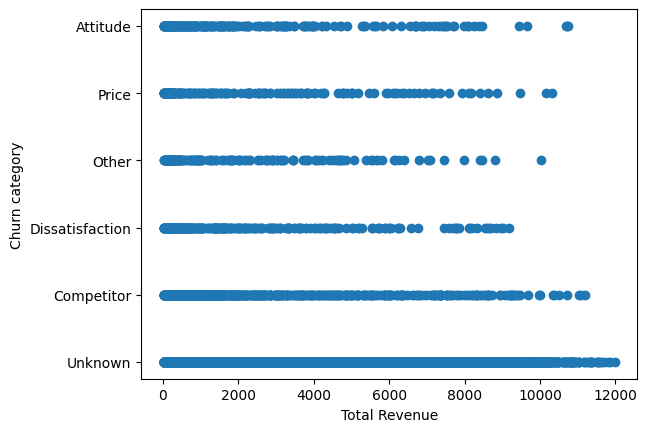

In [64]:
# Data is now clean and we will begin analysis and manipulation
mpt.scatter(df['Total_Revenue'], df['Churn_Category'])
mpt.xlabel('Total Revenue')
mpt.ylabel('Churn category')
mpt.show()

In [65]:
# Majority of the churn is due to a unkown factor but the second biggest factor is to compettitors 


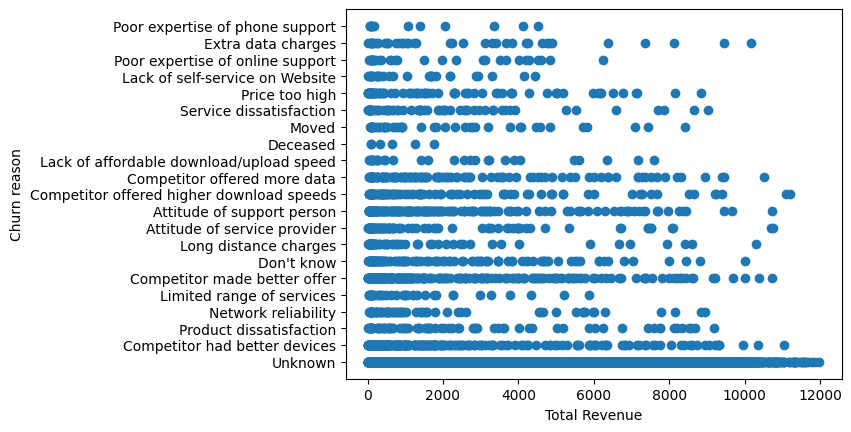

In [66]:
# Competitor had better devices and made better offer are the reasons for Churn
mpt.scatter(df['Total_Revenue'], df['Churn_Reason'])
mpt.xlabel('Total Revenue')
mpt.ylabel('Churn reason')
mpt.show()

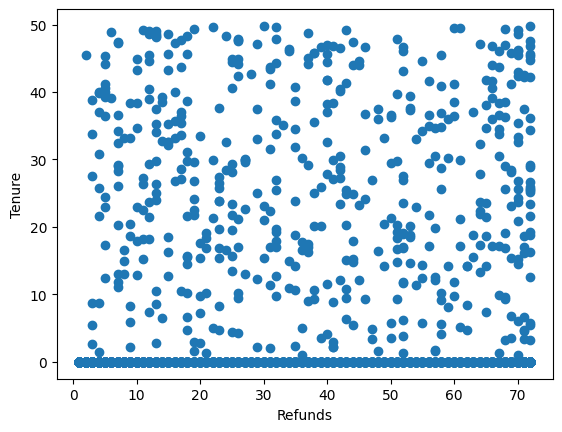

In [67]:
mpt.scatter(df['Tenure_in_Months'], df['Total_Refunds'])
mpt.xlabel('Refunds')
mpt.ylabel('Tenure')
mpt.show()

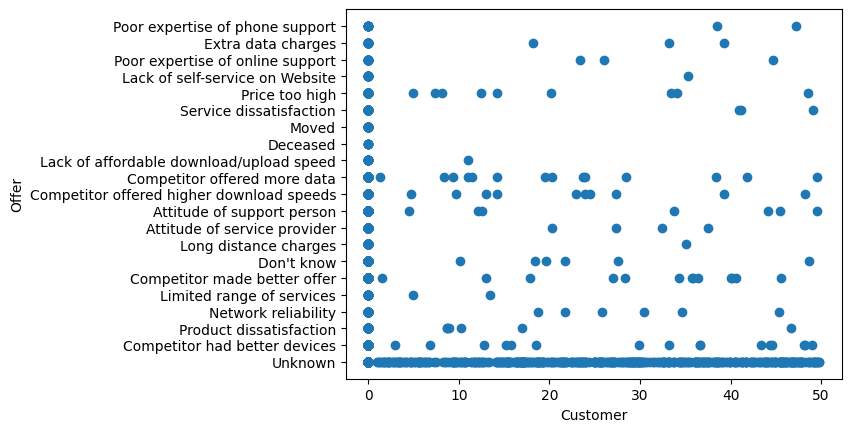

In [68]:

mpt.scatter(df['Total_Refunds'], df['Churn_Reason'])
mpt.xlabel('Customer')
mpt.ylabel('Offer')
mpt.show()

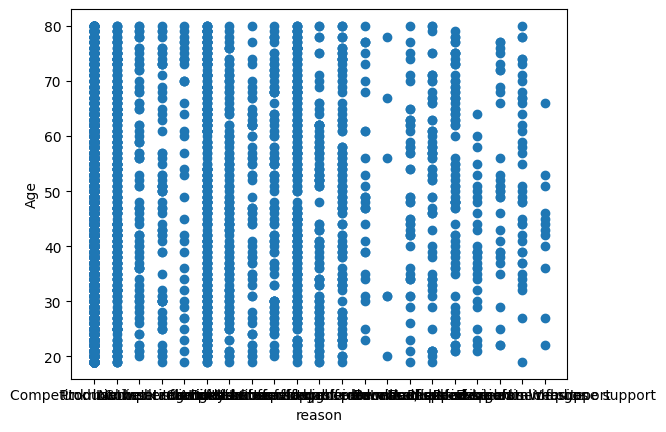

In [69]:
mpt.scatter(df['Churn_Reason'], df['Age'])
mpt.xlabel('reason')
mpt.ylabel('Age')
mpt.show()

In [75]:
Age_reason = df.groupby('Age')['Churn_Reason'].value_counts().unstack()


In [76]:
Age_reason

Churn_Reason,Attitude of service provider,Attitude of support person,Competitor had better devices,Competitor made better offer,Competitor offered higher download speeds,Competitor offered more data,Deceased,Don't know,Extra data charges,Lack of affordable download/upload speed,...,Limited range of services,Long distance charges,Moved,Network reliability,Poor expertise of online support,Poor expertise of phone support,Price too high,Product dissatisfaction,Service dissatisfaction,Unknown
Age,,,,,,,,,,,,,,,,,,,,,
19,NaN,1.0,4.0,3.0,2.0,1.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,109.0
20,1.0,3.0,5.0,7.0,1.0,3.0,1.0,3.0,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,97.0
21,2.0,1.0,6.0,7.0,3.0,NaN,NaN,3.0,NaN,NaN,...,1.0,1.0,1.0,2.0,NaN,NaN,2.0,2.0,4.0,104.0
22,1.0,4.0,3.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,2.0,1.0,3.0,2.0,NaN,103.0
23,NaN,4.0,3.0,8.0,3.0,5.0,NaN,2.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,9.0,2.0,5.0,NaN,3.0,NaN,4.0,NaN,NaN,...,1.0,NaN,NaN,2.0,1.0,NaN,NaN,2.0,NaN,40.0
77,1.0,3.0,5.0,8.0,NaN,NaN,NaN,1.0,NaN,3.0,...,2.0,1.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,43.0
78,3.0,4.0,2.0,5.0,2.0,3.0,1.0,1.0,2.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,2.0,3.0,NaN,33.0


array([[<Axes: title={'center': 'Attitude'}>,
        <Axes: title={'center': 'Competitor'}>],
       [<Axes: title={'center': 'Dissatisfaction'}>,
        <Axes: title={'center': 'Other'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Unknown'}>]], dtype=object)

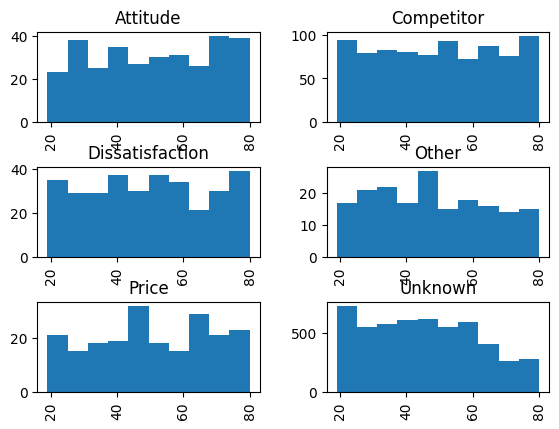

In [72]:
df.hist('Age', 'Churn_Category')  

In [87]:
churned_customers = df[df['Customer_Status'] == 'Churned']
churn_rates = churned_customers.groupby('City').size() / df.groupby('City').size()
top_5_cities = churn_rates.nlargest(5)


In [89]:
top_5_cities_list = top_5_cities.index.tolist()

print("Top 5 Cities with Highest Churn Rates:")
for city in top_5_cities_list:
    print(city)

Top 5 Cities with Highest Churn Rates:
Boulder Creek
Eldridge
Johannesburg
Riverbank
Smith River


In [77]:
# Save the cleaned dataset
df.to_csv("Telecom_Data_cleaned.csv",index=False)